In [65]:
import PIL
import numpy as np
import torch
import torch.nn as nn
import jpeglib
import matplotlib.pyplot as plt

from PIL import Image

In [15]:
img = torch.arange(48).reshape(6,8).float()
img

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20., 21., 22., 23.],
        [24., 25., 26., 27., 28., 29., 30., 31.],
        [32., 33., 34., 35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44., 45., 46., 47.]])

In [38]:
nn.functional.pad(img.reshape(6,8), pad=((1,1,1,1)), mode="constant", value=0)

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  0.],
        [ 0.,  8.,  9., 10., 11., 12., 13., 14., 15.,  0.],
        [ 0., 16., 17., 18., 19., 20., 21., 22., 23.,  0.],
        [ 0., 24., 25., 26., 27., 28., 29., 30., 31.,  0.],
        [ 0., 32., 33., 34., 35., 36., 37., 38., 39.,  0.],
        [ 0., 40., 41., 42., 43., 44., 45., 46., 47.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [24]:
unfold = nn.Unfold(kernel_size=(3,3),stride=1)
u = unfold(img.reshape(1,6,8))
u

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  8.,  9., 10., 11., 12., 13., 16., 17.,
         18., 19., 20., 21., 24., 25., 26., 27., 28., 29.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  9., 10., 11., 12., 13., 14., 17., 18.,
         19., 20., 21., 22., 25., 26., 27., 28., 29., 30.],
        [ 2.,  3.,  4.,  5.,  6.,  7., 10., 11., 12., 13., 14., 15., 18., 19.,
         20., 21., 22., 23., 26., 27., 28., 29., 30., 31.],
        [ 8.,  9., 10., 11., 12., 13., 16., 17., 18., 19., 20., 21., 24., 25.,
         26., 27., 28., 29., 32., 33., 34., 35., 36., 37.],
        [ 9., 10., 11., 12., 13., 14., 17., 18., 19., 20., 21., 22., 25., 26.,
         27., 28., 29., 30., 33., 34., 35., 36., 37., 38.],
        [10., 11., 12., 13., 14., 15., 18., 19., 20., 21., 22., 23., 26., 27.,
         28., 29., 30., 31., 34., 35., 36., 37., 38., 39.],
        [16., 17., 18., 19., 20., 21., 24., 25., 26., 27., 28., 29., 32., 33.,
         34., 35., 36., 37., 40., 41., 42., 43., 44., 45.],
        [17., 18., 19., 20.

In [22]:
u.T

tensor([[ 0.,  1.,  2.,  8.,  9., 10., 16., 17., 18.],
        [ 1.,  2.,  3.,  9., 10., 11., 17., 18., 19.],
        [ 2.,  3.,  4., 10., 11., 12., 18., 19., 20.],
        [ 3.,  4.,  5., 11., 12., 13., 19., 20., 21.],
        [ 4.,  5.,  6., 12., 13., 14., 20., 21., 22.],
        [ 5.,  6.,  7., 13., 14., 15., 21., 22., 23.],
        [ 8.,  9., 10., 16., 17., 18., 24., 25., 26.],
        [ 9., 10., 11., 17., 18., 19., 25., 26., 27.],
        [10., 11., 12., 18., 19., 20., 26., 27., 28.],
        [11., 12., 13., 19., 20., 21., 27., 28., 29.],
        [12., 13., 14., 20., 21., 22., 28., 29., 30.],
        [13., 14., 15., 21., 22., 23., 29., 30., 31.],
        [16., 17., 18., 24., 25., 26., 32., 33., 34.],
        [17., 18., 19., 25., 26., 27., 33., 34., 35.],
        [18., 19., 20., 26., 27., 28., 34., 35., 36.],
        [19., 20., 21., 27., 28., 29., 35., 36., 37.],
        [20., 21., 22., 28., 29., 30., 36., 37., 38.],
        [21., 22., 23., 29., 30., 31., 37., 38., 39.],
        [2

In [26]:
u.T[:,4].reshape(4,6)

tensor([[ 9., 10., 11., 12., 13., 14.],
        [17., 18., 19., 20., 21., 22.],
        [25., 26., 27., 28., 29., 30.],
        [33., 34., 35., 36., 37., 38.]])

In [82]:
t = torch.arange(48*2).reshape(2,6,8).float()

In [85]:
p = nn.functional.pad(t, pad=(1,1,1,1), mode="constant", value=0)
p

tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  0.],
         [ 0.,  8.,  9., 10., 11., 12., 13., 14., 15.,  0.],
         [ 0., 16., 17., 18., 19., 20., 21., 22., 23.,  0.],
         [ 0., 24., 25., 26., 27., 28., 29., 30., 31.,  0.],
         [ 0., 32., 33., 34., 35., 36., 37., 38., 39.,  0.],
         [ 0., 40., 41., 42., 43., 44., 45., 46., 47.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0., 48., 49., 50., 51., 52., 53., 54., 55.,  0.],
         [ 0., 56., 57., 58., 59., 60., 61., 62., 63.,  0.],
         [ 0., 64., 65., 66., 67., 68., 69., 70., 71.,  0.],
         [ 0., 72., 73., 74., 75., 76., 77., 78., 79.,  0.],
         [ 0., 80., 81., 82., 83., 84., 85., 86., 87.,  0.],
         [ 0., 88., 89., 90., 91., 92., 93., 94., 95.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]])

In [90]:
x = nn.Unfold(kernel_size=3, stride=1)(p)

In [93]:
x[:,2]

tensor([ 0.,  0.,  0.,  1.,  2.,  3.,  9., 10., 11.,  0.,  0.,  0., 49., 50.,
        51., 57., 58., 59.])

In [94]:
x.shape

torch.Size([18, 48])

In [96]:
x.reshape(2,9,48)[:,:,3]

tensor([[ 0.,  0.,  0.,  2.,  3.,  4., 10., 11., 12.],
        [ 0.,  0.,  0., 50., 51., 52., 58., 59., 60.]])

In [7]:
lena = Image.open("lena_color.tiff")

In [8]:
lena = np.array(lena)

In [10]:
lena.shape

(512, 512, 3)

In [47]:
dct = jpeglib.read_dct("8068.jpg")
Y, Cb, Cr = dct.Y * dct.qt[0], dct.Cb * dct.qt[1], dct.Cr * dct.qt[1]

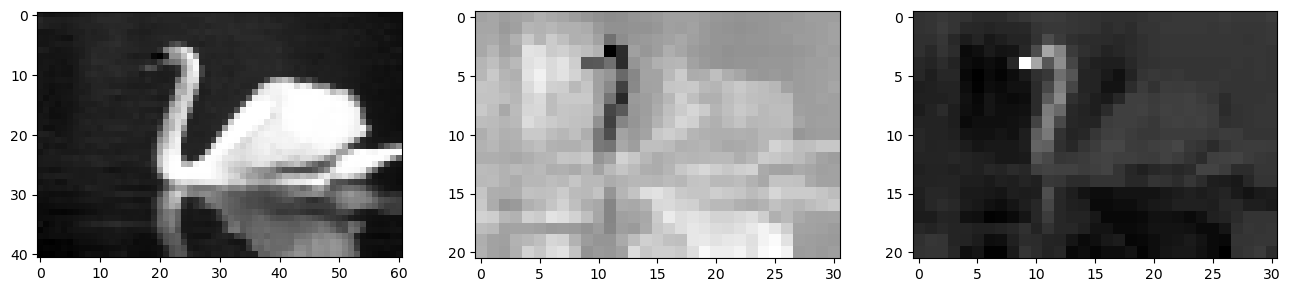

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(16,9))
axs[0].imshow(Y[:,:,0,0], cmap="gray")
axs[1].imshow(Cb[:,:,0,0], cmap="gray")
axs[2].imshow(Cr[:,:,0,0], cmap="gray")

In [211]:
Y

array([[[[-708,    7,   -3, ...,    0,    0,    0],
         [ -10,   14,   -5, ...,    0,    0,    0],
         [  31,    3,   -6, ...,    0,    0,    0],
         ...,
         [  12,    0,    0, ...,    0,    0,    0],
         [   5,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]],

        [[-744,    5,   12, ...,    0,    0,    0],
         [ -20,   -6,   -2, ...,    0,    0,    0],
         [  -4,    5,   -2, ...,    0,    0,    0],
         ...,
         [   0,    0,    0, ...,    0,    0,    0],
         [  10,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]],

        [[-750,    6,   10, ...,    0,    0,    0],
         [ -35,    7,    5, ...,    0,    0,    0],
         [  -2,  -10,   -6, ...,    0,    0,    0],
         ...,
         [  10,   -4,    0, ...,    0,    0,    0],
         [   5,    6,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]],

        ...,

  

In [56]:
Y_norm = (Y - np.mean(Y, axis=(0,1))) / (np.std(Y, axis=(0,1)) + 1e-3)
Cr_norm = (Cr - np.mean(Cr, axis=(0,1))) / (np.std(Cr, axis=(0,1)) + 1e-3)
Cb_norm = (Cb - np.mean(Cb, axis=(0,1))) / (np.std(Cb, axis=(0,1)) + 1e-3)

In [58]:
Y10 = torch.from_numpy(Y_norm).reshape(Y_norm.shape[0], Y_norm.shape[1], 64)
Cr10 = torch.from_numpy(Cr_norm).reshape(Cr_norm.shape[0], Cr_norm.shape[1], 64)

In [60]:
Y10.shape

torch.Size([41, 61, 64])

In [73]:
Y10 = Y10.permute(2,0,1)

In [125]:
Y10 = Y10.float()
Y10.shape

torch.Size([64, 41, 61])

In [74]:
KSIZE = 7

In [75]:
unfold = nn.Unfold(kernel_size=KSIZE, stride=1)

In [76]:
Y10_padded = nn.functional.pad(Y10, pad=(3,3,3,3), mode="constant", value=0)
Y10_padded.shape

torch.Size([64, 47, 67])

In [77]:
X = unfold(Y10_padded)
X.shape

torch.Size([3136, 2501])

In [111]:
# C, kernel_size**2, H, W
X = X.reshape(64,49,41,61).float()

In [134]:
Pq = torch.randn(256, 64).float()
Pk = torch.randn(256, 64).float()
Pv = torch.randn(256, 64).float()

In [148]:
K = (Y10.T @ Pk.T).T
K.shape

torch.Size([256, 41, 61])

In [147]:
Q = (X.T @ Pq.T).T
Q.shape

torch.Size([256, 49, 41, 61])

In [130]:
A = Q * K.view(256, 1, 41, 61)
A.shape

torch.Size([256, 49, 41, 61])

In [132]:
%timeit Q * K.view(256, 1, 41, 61)

5.01 ms ± 140 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [157]:
%timeit A = nn.functional.softmax(Q * K.view(256, 1, 41, 61), dim=1)


51.8 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [146]:
V = (X.T @ Pv.T).T
V.shape

torch.Size([256, 49, 41, 61])

In [139]:
Z = (A * V).sum(dim=1)

In [140]:
Z.shape

torch.Size([256, 41, 61])

**Rinse and repeat**

In [159]:
attn = nn.MultiheadAttention(embed_dim=256, num_heads=4, add_bias_kv=True, batch_first=True)

In [164]:
K_tiled = torch.tile(K.view(256, 1, 41, 61), (1,49,1,1)).conti

In [208]:
%timeit z3 = attn(query=K.T.reshape(61*41,1,256), key=Q.T.reshape(61*41,49,256), value=V.T.reshape(61*41,49,256), need_weights=False)

59.3 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [188]:
%timeit z = nn.functional.scaled_dot_product_attention(query=Q.T, key=K.T.view(61,41,1,256), value=V.T)

18.2 ms ± 237 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [194]:
Q.T.shape

torch.Size([61, 41, 49, 256])

In [195]:
Q.T.reshape(61,41,49,4,64).permute(3,0,1,2,4).shape

torch.Size([4, 61, 41, 49, 64])

In [196]:
K.T.reshape(61,41,1,4,64).permute(3,0,1,2,4).shape

torch.Size([4, 61, 41, 1, 64])

In [197]:
V.T.reshape(61,41,49,4,64).permute(3,0,1,2,4).shape

torch.Size([4, 61, 41, 49, 64])

In [201]:
%timeit z2 = nn.functional.scaled_dot_product_attention( \
    key=Q.T.reshape(61,41,49,4,64).permute(3,0,1,2,4), \
    query=K.T.reshape(61,41,1,4,64).permute(3,0,1,2,4), \
    value=V.T.reshape(61,41,49,4,64).permute(3,0,1,2,4) \
)

56.2 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [202]:
z2.shape

torch.Size([4, 61, 41, 1, 64])

In [204]:
z2 = z2.permute(1,2,3,0,4).reshape(61,41,256)

In [206]:
z2.shape

torch.Size([61, 41, 256])

In [210]:
str(nn.GELU)

"<class 'torch.nn.modules.activation.GELU'>"

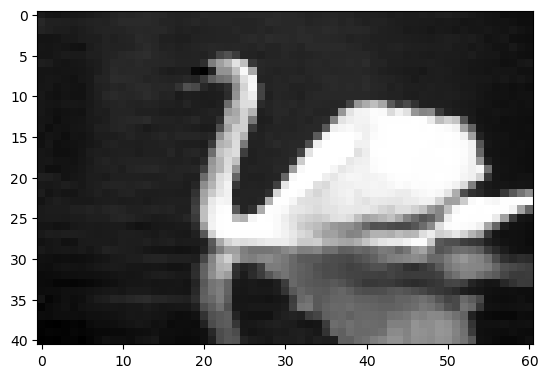

In [44]:
plt.imshow(Y_deq[:,:,0,0], cmap="gray")

In [142]:
dct.Y.shape

(41, 61, 8, 8)

In [212]:
bilin = nn.Bilinear(in1_features=64, in2_features=256, out_features=256)

In [214]:
Y.shape

(41, 61, 8, 8)

In [221]:
u = nn.Unfold(kernel_size=3, padding=(1,1), stride=1)
u(Y10).shape

torch.Size([576, 2501])

In [222]:
Y10.shape

torch.Size([64, 41, 61])

In [220]:
41 * 61

2501